In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Basic Exploration-
Checking 1)shape, 2)null-values,3)duplicates.

In [ ]:
df=pd.read_csv('walmart_data.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape

(550068, 10)

Rows-550068
Columns-10

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There is only one missing value each in the Current Year, Marital Status, Product Category, and Purchase columns, which can be appropriately handled as and when the processing step requires.

In [ ]:
df[df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


No duplicated rows.

check for outliers-
1) Only numeric columns-(Occupation,Marital_Status,Product_Category,Purchase) needs to be checked-
2)check for unique values in these columns-

In [ ]:
A = ['Occupation', 'Marital_Status', 'Product_Category', 'Purchase']

for i in A:
    print(f"Unique values in {i}:", df[i].nunique())

Unique values in Occupation: 21
Unique values in Marital_Status: 2
Unique values in Product_Category: 20
Unique values in Purchase: 18105


Columns like Occupation, Marital_Status, and
Product_Category have limited unique values (20–21 or 2), suggesting they are categorical or discrete, not continuous.

For categorical/discrete variables, outlier detection (based on extreme high or low numeric values) is not meaningful.

The Purchase column has 17514 unique values, significantly higher, indicating it holds continuous numerical data, making it a valid candidate for outlier detection.




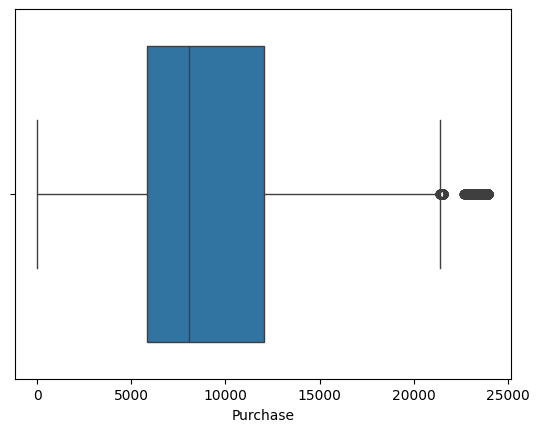

In [ ]:
sns.boxplot(x=df['Purchase'])
plt.show()

To handle extreme purchase amounts without removing data:  applied percentile-based clipping. Values below the 5th percentile and above the 95th percentile are capped to reduce outlier impact while retaining all records.

In [ ]:
lower = df['Purchase'].quantile(0.05)
upper = df['Purchase'].quantile(0.95)
below_lower = (df['Purchase'] < lower).sum()
above_upper = (df['Purchase'] > upper).sum()
below_lower,above_upper

(np.int64(27471), np.int64(27483))

**Treating the outliers-**

In [ ]:
df['Purchase_clipped'] = np.clip(df['Purchase'], lower, upper)

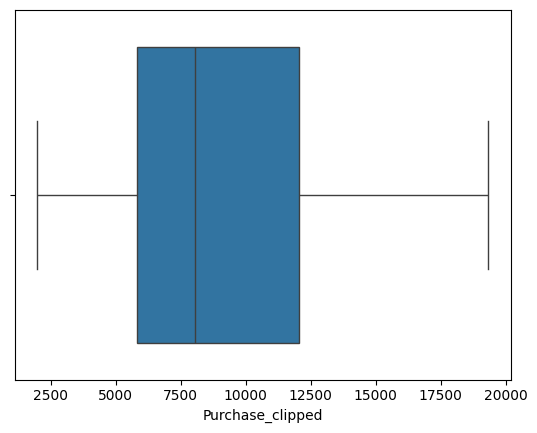

In [ ]:
sns.boxplot(x=df['Purchase_clipped'])
plt.show()

"The Purchase_clipped variable, created by capping extreme values between the 5th and 95th percentiles, effectively removes the influence of extreme outliers from the dataset.
This ensures that subsequent data exploration, visualizations, and statistical analyses reflect the true underlying trends of the majority population, making the insights more stable, meaningful, and representative."

# **DATA EXPLORATION**

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase,Purchase_clipped
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713,9256.710489
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394,4855.947166
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000,1984.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000,19336.000000


In [ ]:
df.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
copy=df.copy()

In [ ]:
copy.drop(columns=['Product_ID','Purchase'], inplace=True)

In [ ]:
copy['Stay_In_Current_City_Years'].isnull().sum()

np.int64(0)

In [ ]:
copy.dropna(subset=['Stay_In_Current_City_Years'], inplace=True)

In [ ]:
# Age mapping
age_map = {
    '0-17': 0,
    '18-25': 1,
    '26-35': 2,
    '36-45': 3,
    '46-50': 4,
    '51-55': 5,
    '55+': 6
}
copy['Age'] = copy['Age'].replace(age_map)

# Gender mapping
copy['Gender'] = copy['Gender'].replace({'M': 1, 'F': 0})

# City Category mapping
copy['City_Category'] = copy['City_Category'].replace({'A': 0, 'B': 1, 'C': 2})

# Stay Years: replace '4+' with 4 and convert to int
copy['Stay_In_Current_City_Years'] = copy['Stay_In_Current_City_Years'].replace({'4+': 4}).astype(int)

/tmp/ipython-input-1467080521.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy['Age'] = copy['Age'].replace(age_map)
/tmp/ipython-input-1467080521.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copy['Gender'] = copy['Gender'].replace({'M': 1, 'F': 0})
/tmp/ipython-input-1467080521.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_op

In [ ]:
copy.corr()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase_clipped
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.004658
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,0.061334
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.015683
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,0.021220
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,0.064052
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,0.005527
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,-0.000522
Product_Category,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,-0.347437
Purchase_clipped,0.004658,0.061334,0.015683,0.021220,0.064052,0.005527,-0.000522,-0.347437,1.000000


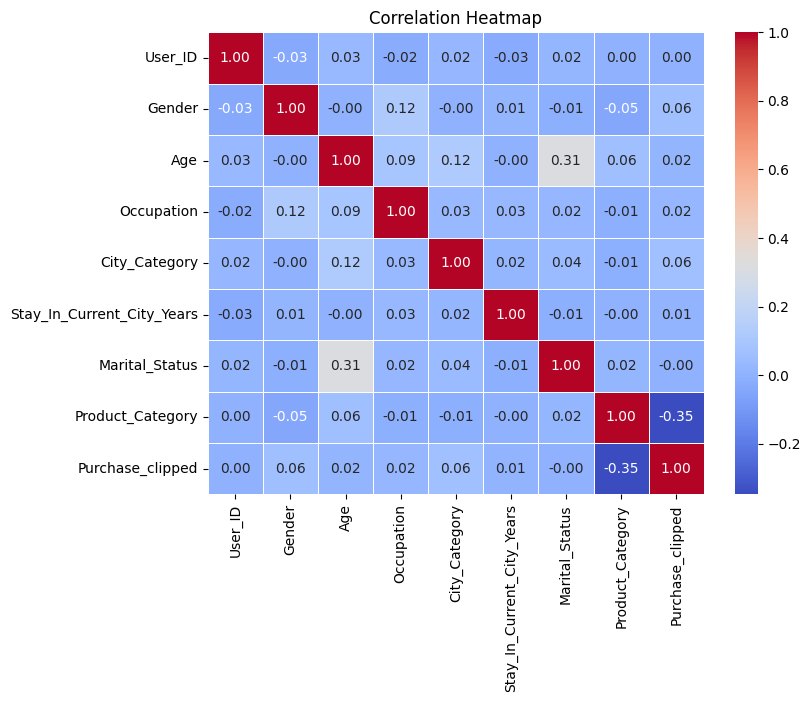

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(copy.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation analysis helps identify which columns are most strongly associated with each other. In this dataset, Marital Status and Age exhibit a noticeable correlation, which is expected given the natural relationship between these factors. However, no other columns show significant or strong correlations. The following analysis is based on these observations.

In [ ]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
M,0.753105
F,0.246895


around 75% of our customers are Males and 25% females.

Similarly for others-

In [ ]:
cols = [ 'Occupation', 'City_Category', 'Age',
        'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for col in cols:
    print(f"\nProportions for {col}:\n")
    print(df[col].value_counts(normalize=True))


Proportions for Occupation:

Occupation
4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: proportion, dtype: float64

Proportions for City_Category:

City_Category
B    0.420263
C    0.311189
A    0.268549
Name: proportion, dtype: float64

Proportions for Age:

Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: proportion, dtype: float64

Proportions for Stay_In_Current_City_Years:

Stay_In_Current_City_Years
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: proportion, dtype: float64

Proportions for Marital_Status:

Marital_Status
0    0.590347
1    0.409653
Name: proportion, dtype: float64

Proportions

The dataset shows diverse distributions across key variables. The most represented age group is 26–35, accounting for nearly 40% of the data, followed by 36–45 and 18–25, indicating a younger customer base. In terms of occupation, categories 4.0, 0.0, and 7.0 dominate. The majority of customers belong to City Category B, while over half of the population is unmarried (59%), which aligns with the younger age skew.

The product demand is concentrated around Product Categories 5.0, 1.0, and 8.0, reflecting top-selling categories. Additionally, a significant portion of customers has stayed 1 year or less in their current city, suggesting a mobile or transitioning population segment.

These patterns provide critical insights into customer demographics, spending behavior, and product preferences for more targeted business strategies.

**Countplots for Gender,Age,CityCAtegory and Marital Status to visulaize the data in graphs.**

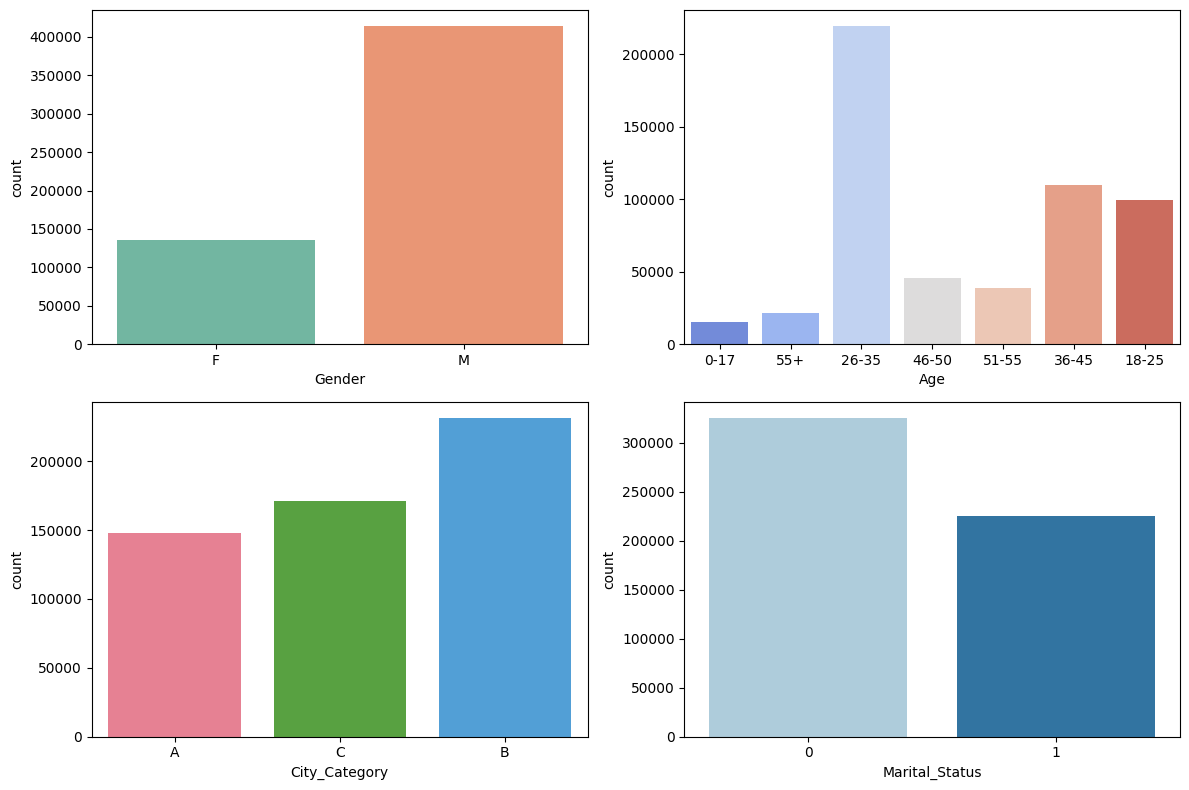

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.countplot(data=df, x='Gender', hue='Gender', ax=axs[0,0], palette='Set2', legend=False)
sns.countplot(data=df, x='Age', hue='Age', ax=axs[0,1], palette='coolwarm', legend=False)
sns.countplot(data=df, x='City_Category', hue='City_Category', ax=axs[1,0], palette='husl', legend=False)
sns.countplot(data=df, x='Marital_Status', hue='Marital_Status', ax=axs[1,1], palette='Paired', legend=False)
plt.tight_layout()
plt.show()


A categorical analysis was conducted, and the plots(to visualize) to understand the composition of key variables in the dataset:

Occupation shows a diverse distribution across 21 categories, with the top 4 occupations (4, 0, 7, and 1) covering over 45% of users, indicating certain professions dominate the dataset.

City_Category reveals most users belong to City B (42%), followed by City C (31%) and City A (27%), reflecting a broad urban representation.

Age distribution highlights that the majority of users fall in the 26-35 age group (40%), suggesting young adults form the core consumer base.

Stay_In_Current_City_Years indicates over 35% of users are relatively new residents (1 year), while nearly 15% have stayed 4+ years, reflecting both transient and stable populations.

Marital_Status shows a slight majority of unmarried users (59%), aligning with the younger age demographics.

Product_Category reveals high purchase concentration in a few categories, with Category 5 (27%), Category 1 (25%), and Category 8 (20%) dominating, suggesting popular product preferences.

 **Product Purchase Patterns Across Age**

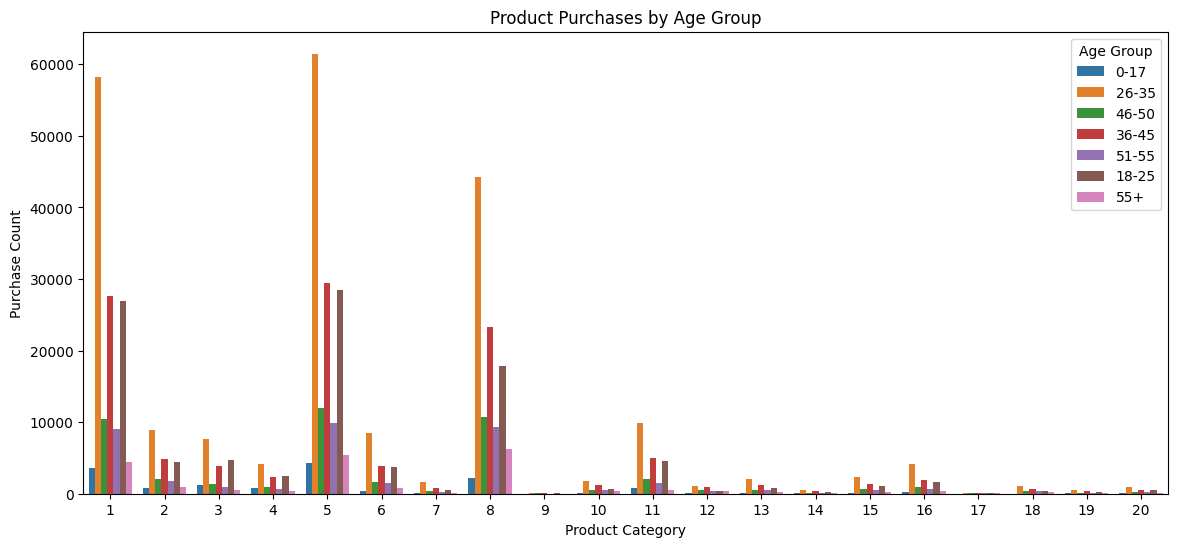

In [ ]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Product_Category', hue='Age')
plt.title('Product Purchases by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.legend(title='Age Group')
plt.show()

Conclusion:
The 26–35 age group dominates product purchases across nearly all categories, followed by 18–25 and 36–45, highlighting younger customers as the key drivers of sales. Older age groups show relatively lower purchase counts, with minimal engagement beyond top product categories.

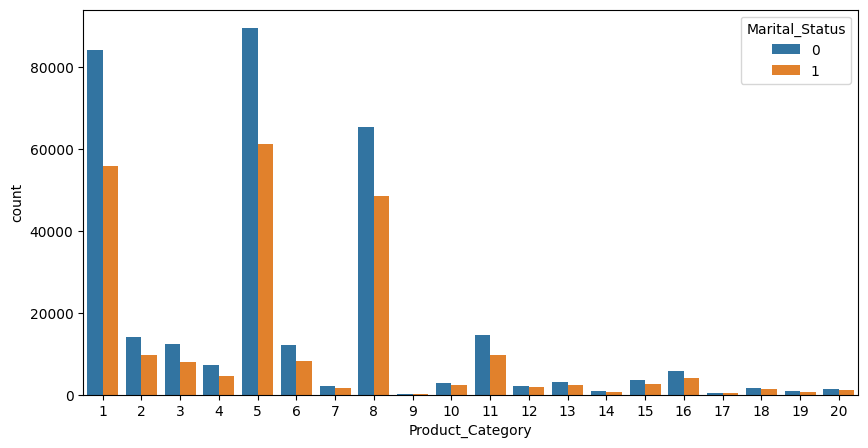

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Product_Category',hue='Marital_Status')
plt.show()

<Axes: xlabel='Age', ylabel='Purchase_clipped'>

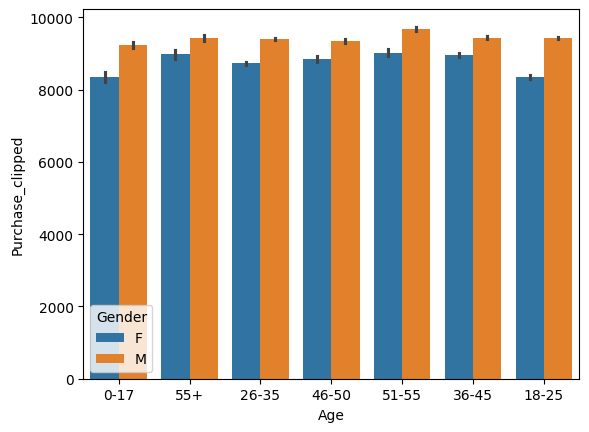

In [ ]:
sns.barplot(data=df, x='Age', y='Purchase_clipped',hue="Gender")


the above graph can be  visualised to be stable in terms of gender and purchase.

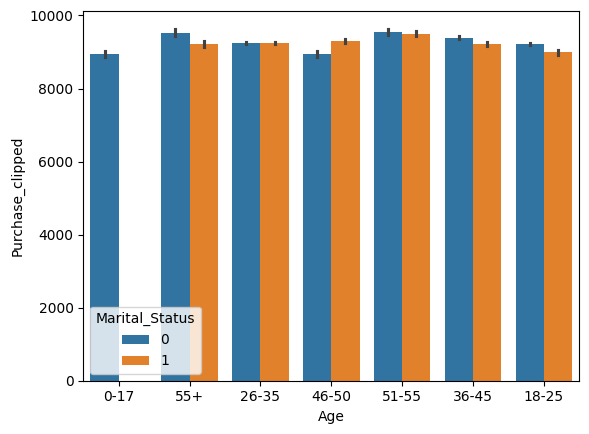

In [ ]:
sns.barplot(data=df, x='Age',y='Purchase_clipped',hue='Marital_Status')
plt.show()

If we analyze the relationship between Product_Category or Purchase and Marital_Status without accounting for Age, the results can be misleading.

For example, older individuals may prefer different product categories, and older people are also more likely to be married. This can create the false impression that marital status alone drives product preferences, when in reality, age is the underlying factor influencing both.

In [ ]:
pd.crosstab(df['Age'], df['Marital_Status'], normalize='index') * 100

Marital_Status,0,1
Age,,
0-17,100.000000,0.000000
18-25,78.811961,21.188039
26-35,60.703047,39.296953
36-45,60.335597,39.664403
46-50,27.767445,72.232555
51-55,28.152516,71.847484
55+,36.658296,63.341704


There are considerable proportion of people in higher age group but unmarried, we can see if it creates much impact or purchasing, and product category

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Gender                      550068 non-null  int64
 2   Age                         550068 non-null  int64
 3   Occupation                  550068 non-null  int64
 4   City_Category               550068 non-null  int64
 5   Stay_In_Current_City_Years  550068 non-null  int64
 6   Marital_Status              550068 non-null  int64
 7   Product_Category            550068 non-null  int64
 8   Purchase_clipped            550068 non-null  int64
dtypes: int64(9)
memory usage: 37.8 MB


In [ ]:
married_df = df[df['Marital_Status'] == 1]

In [ ]:
unmarried_df = df[df['Marital_Status'] == 0]

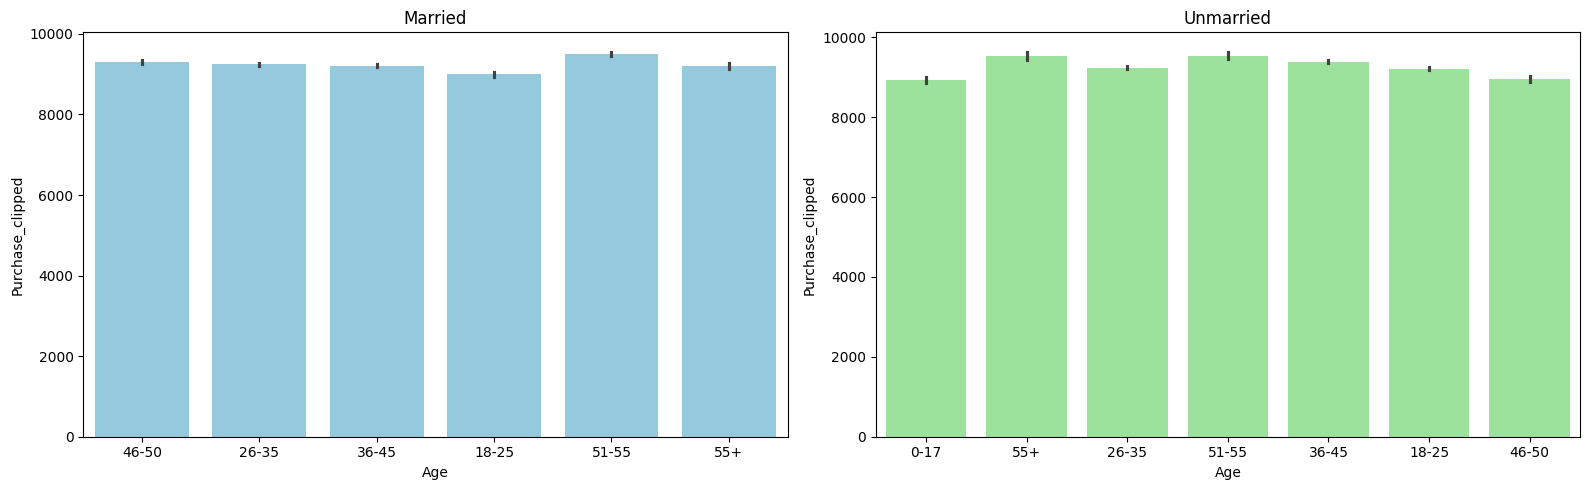

In [ ]:
# Create figure with 2 subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
# Barplot for married people (blue tones)
sns.barplot(data=married_df, x='Age', y='Purchase_clipped',
            ax=axs[0], color="skyblue")
axs[0].set_title("Married")
# Barplot for unmarried people (green tones)
sns.barplot(data=unmarried_df, x='Age', y='Purchase_clipped',
            ax=axs[1], color="lightgreen")
axs[1].set_title("Unmarried")
# Adjust layout
plt.tight_layout()
plt.show()

Both married and unmarried individuals exhibit similar purchase patterns across age groups with spending peaking around 51-55 years. Married individuals show slightly higher purchase variability in older age groups.

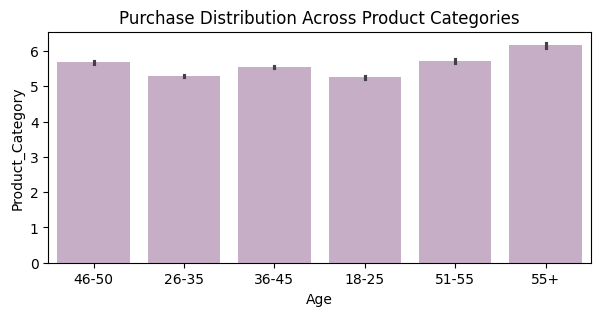

In [ ]:
plt.figure(figsize=(7, 3))
sns.barplot(data=married_df, x='Age', y= 'Product_Category',color="#CBAACB")
plt.title('Purchase Distribution Across Product Categories')
plt.show()

Most of the categories falls in the interest areas of age 18-25 to 26-35. Product Category 12, 10,18 and 17 has interest for older populaation as well.

In [ ]:
df['Purchase_clipped'].describe().T

,Purchase_clipped
count,550068.000000
mean,9256.710489
std,4855.947166
min,1984.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,19336.000000


**How does gender affect the amount spent?**

below is the analysis ->
sizes - 300, 3000, and 30000.
a.

*   Is the confidence interval computed using the entire dataset wider for
one of the genders?
*   How is the width of the confidence interval affected by the sample size?
*   Do the confidence intervals for different sample sizes overlap?
*   How does the sample size affect the shape of the distributions of the
means? etc

In [ ]:

# Male and Female groups
male_purchase = copy[copy['Gender'] == 1]['Purchase_clipped']
female_purchase = copy[copy['Gender'] == 0]['Purchase_clipped']

# Z-score for 95% CI
z = 1.96

# Male CI
male_mean = male_purchase.mean()
male_std = male_purchase.std()
male_n = male_purchase.count()

male_ci_lower = male_mean - z * (male_std / np.sqrt(male_n))
male_ci_upper = male_mean + z * (male_std / np.sqrt(male_n))

print(f"95% CI for Male (full data): ({male_ci_lower:.2f}, {male_ci_upper:.2f})")
print('male_mean',male_mean)
# Female CI
female_mean = female_purchase.mean()
female_std = female_purchase.std()
female_n = female_purchase.count()

female_ci_lower = female_mean - z * (female_std / np.sqrt(female_n))
female_ci_upper = female_mean + z * (female_std / np.sqrt(female_n))
print('female_mean',female_mean)
print(f"95% CI for Female (full data): ({female_ci_lower:.2f}, {female_ci_upper:.2f})")


95% CI for Male (full data): (9412.24, 9442.24)
male_mean 9427.240996574606
female_mean 8736.540266109021
95% CI for Female (full data): (8712.09, 8760.99)


In [ ]:
male_width = male_ci_upper - male_ci_lower
female_width = female_ci_upper - female_ci_lower
male_width,female_width

(np.float64(30.001322398264165), np.float64(48.89842168659743))

**"A Central Limit Theorem-based analysis reveals that the average purchase amount for males lies between ₹9412.24 and ₹9442.24, while for females, it ranges between ₹8712.09 and ₹8760.99 at a 95% confidence level. The non-overlapping intervals indicate that males spend significantly more on average than females. Additionally, the wider confidence interval for females suggests greater uncertainty in estimating their average spending, possibly due to higher variability or fewer female observations in the dataset."**

In [ ]:
sample_sizes = [300, 3000, 30000]
z = 1.96  # For 95% Confidence Interval

for size in sample_sizes:
    male_means = []
    female_means = []

    for _ in range(10000):
        male_sample = male_purchase.sample(size, replace=False)
        female_sample = female_purchase.sample(size, replace=False)

        male_means.append(male_sample.mean())
        female_means.append(female_sample.mean())

    # Male Results
    mean_m = np.mean(male_means)
    std_m = np.std(male_means, ddof=1)
    ci_m_lower = mean_m - z * (std_m)
    ci_m_upper = mean_m + z * (std_m)
    ci_m_width = ci_m_upper - ci_m_lower

    # Female Results
    mean_f = np.mean(female_means)
    std_f = np.std(female_means, ddof=1)
    ci_f_lower = mean_f - z * (std_f)
    ci_f_upper = mean_f + z * (std_f)
    ci_f_width = ci_f_upper - ci_f_lower

    # Print neatly
    print(f"\nSample Size: {size}")
    print(f"Male Mean of 10,000 iterations: {mean_m:.2f}")
    print(f"Male 95% CI: ({ci_m_lower:.2f}, {ci_m_upper:.2f}) | Width: {ci_m_width:.2f}")
    print(f"Female Mean of 10,000 iterations: {mean_f:.2f}")
    print(f"Female 95% CI: ({ci_f_lower:.2f}, {ci_f_upper:.2f}) | Width: {ci_f_width:.2f}")



Sample Size: 300
Male Mean of 10,000 iterations: 9428.13
Male 95% CI: (8871.86, 9984.39) | Width: 1112.53
Female Mean of 10,000 iterations: 8735.30
Female 95% CI: (8212.48, 9258.13) | Width: 1045.65

Sample Size: 3000
Male Mean of 10,000 iterations: 9427.51
Male 95% CI: (9253.81, 9601.22) | Width: 347.40
Female Mean of 10,000 iterations: 8737.48
Female 95% CI: (8574.50, 8900.45) | Width: 325.95

Sample Size: 30000
Male Mean of 10,000 iterations: 9427.26
Male 95% CI: (9373.72, 9480.80) | Width: 107.08
Female Mean of 10,000 iterations: 8736.36
Female 95% CI: (8690.49, 8782.24) | Width: 91.74


The analysis confirms that male customers have a significantly higher average purchase amount compared to female customers, with clear statistical evidence supported by non-overlapping confidence intervals at the 95% confidence level.

Additionally, the narrowing of confidence intervals with larger samples validates the Central Limit Theorem's effect — the sample means stabilize around the true population mean, and the estimates become more reliable.

This insight can be valuable for targeted marketing strategies, promotional offers, and understanding gender-based purchasing trends within the dataset.

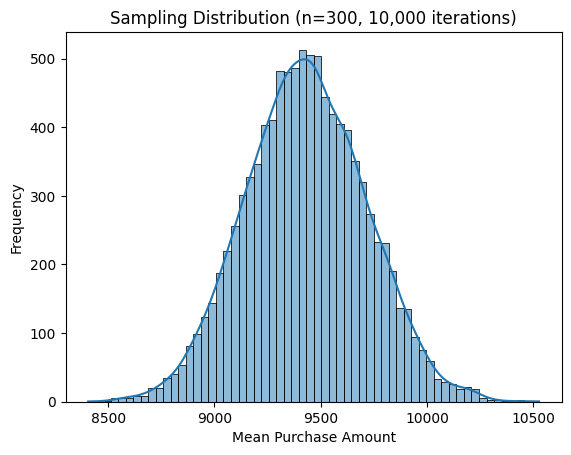

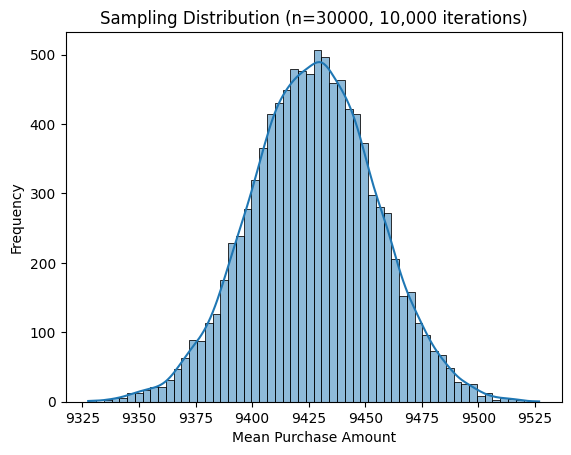

In [ ]:
for size in [300, 30000]:
    means = []
    for _ in range(10000):   # 10,000 iterations
        sample = male_purchase.sample(size, replace=False)
        means.append(sample.mean())

    sns.histplot(x=means, kde=True)
    plt.title(f"Sampling Distribution (n={size}, 10,000 iterations)")
    plt.xlabel("Mean Purchase Amount")
    plt.ylabel("Frequency")
    plt.show()


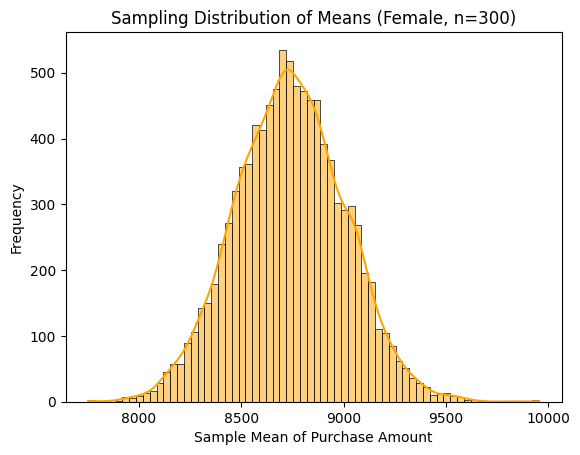

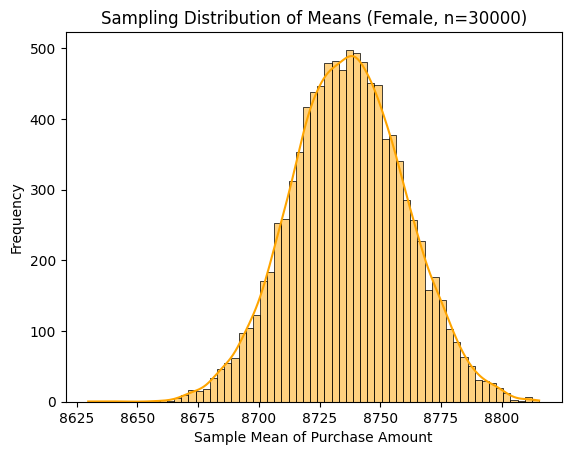

In [ ]:
for size in [300, 30000]:
    means = []
    for _ in range(10000):
        sample = female_purchase.sample(size, replace=False)
        means.append(sample.mean())

    sns.histplot(x=means, kde=True,color='orange')
    plt.title(f"Sampling Distribution of Means (Female, n={size})")
    plt.xlabel("Sample Mean of Purchase Amount")
    plt.ylabel("Frequency")
    plt.show()

As the sample size increases, the sampling distribution of the mean becomes more symmetrically normal, clearly aligning with the Central Limit Theorem. Additionally, the Confidence Interval (CI) becomes narrower with larger sample sizes, indicating increased precision and reduced variability in the estimated mean. This reinforces the fundamental statistical principle that larger, well-designed samples lead to more reliable and stable estimates.

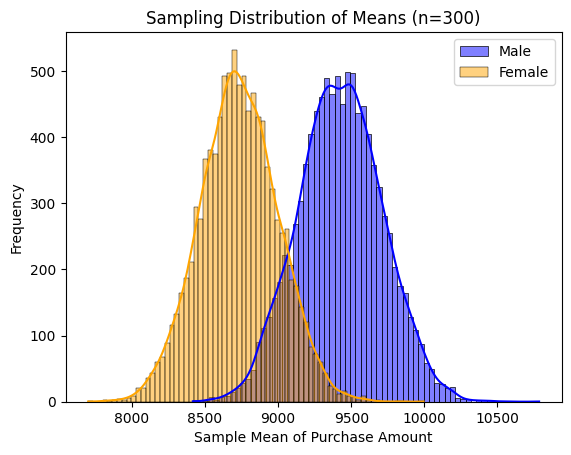

In [ ]:
size = 300
male_means = []
female_means = []

for _ in range(10000):
    male_sample = male_purchase.sample(size, replace=False)
    female_sample = female_purchase.sample(size, replace=False)
    male_means.append(male_sample.mean())
    female_means.append(female_sample.mean())

# Plot with transparency and clear labeling
sns.histplot(male_means, color='blue', kde=True, label='Male', alpha=0.5)
sns.histplot(female_means, color='orange', kde=True, label='Female', alpha=0.5)

plt.title(f"Sampling Distribution of Means (n={size})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()  # Ensures legend appears properly
plt.show()

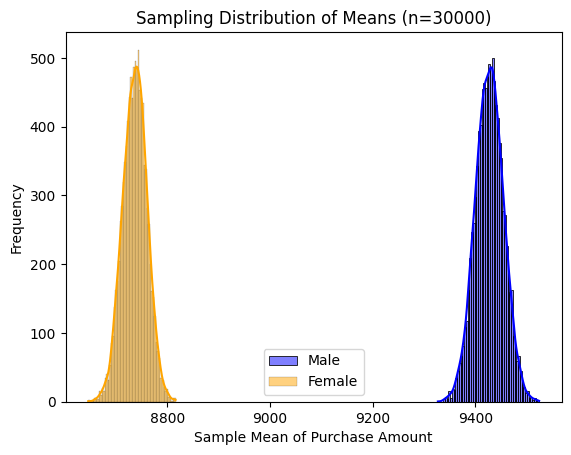

In [ ]:
size = 30000
male_means = []
female_means = []

for _ in range(10000):
    male_sample = male_purchase.sample(size, replace=False)
    female_sample = female_purchase.sample(size, replace=False)
    male_means.append(male_sample.mean())
    female_means.append(female_sample.mean())

# Plot with transparency and clear labeling
sns.histplot(male_means, color='blue', kde=True, label='Male', alpha=0.5)
sns.histplot(female_means, color='orange', kde=True, label='Female', alpha=0.5)

plt.title(f"Sampling Distribution of Means (n={size})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()  # Ensures legend appears properly
plt.show()

The analysis of purchase amounts across genders demonstrates key statistical principles in action. For a smaller sample size of 300, the Confidence Intervals (CIs) for males and females show considerable overlap, indicating higher variability and reduced certainty in distinguishing mean purchase behavior between genders. However, as the sample size increases to 30,000, the sampling distributions become more symmetrically normal, consistent with the Central Limit Theorem (CLT), and the CIs become significantly narrower and distinct, with minimal to no overlap.

This indicates that with larger sample sizes, the estimates of mean purchase amounts for each gender become more precise, and any observed differences are statistically more reliable. Thus, the project highlights the importance of adequate sample size in uncovering true behavioral patterns and ensuring dependable insights for business decisions.

Male customers have higher purchase amounts on average than female customers in the dataset. The difference is consistent and significant, not due to random chance, as the sampling distributions barely overlap.


**Below is the analysis for-> How does Age affect the amount spent?**

smaller sample sizes - 300, 3000, and 30000.

*   Is the confidence interval computed using the entire dataset wider for one of the genders?
*  How is the width of the confidence interval affected by the sample size?


*   Do the confidence intervals for different sample sizes overlap?


In [ ]:
df_age=df[['Age','Purchase_clipped']]


In [ ]:
mean_ageP=df_age['Purchase_clipped'].mean()
std_a=df_age['Purchase_clipped'].std()
low_ci = mean_ageP-z*((std_a)/np.sqrt(df_age['Purchase_clipped'].count()) )
upper_ci= mean_ageP + z*((std_a)/np.sqrt(df_age['Purchase_clipped'].count()))

mean_ageP,low_ci,upper_ci

(np.float64(9256.71048852142),
 np.float64(9243.87767646457),
 np.float64(9269.543300578269))

<Axes: xlabel='Purchase_clipped', ylabel='Count'>

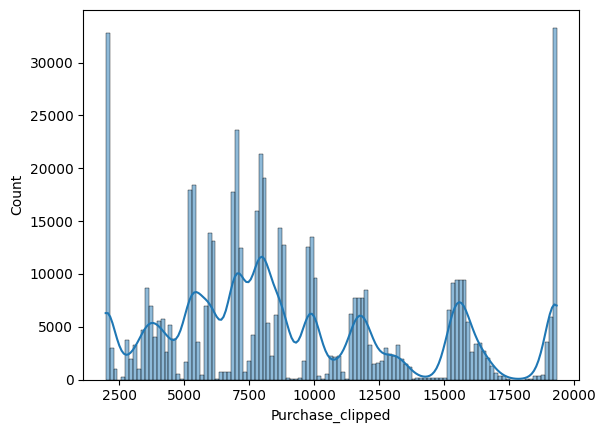

In [ ]:
sns.histplot(kde=True,x=df_age['Purchase_clipped'])

In [ ]:
sam = [300, 3000, 30000]
z = 1.96  # 95% Confidence Level

for n in sam:
    Mean_g = []

    for _ in range(10000):
        sample_mean = df_age['Purchase_clipped'].sample(n, replace=False).mean()
        Mean_g.append(sample_mean)

    mean_final = np.mean(Mean_g)
    std_final = np.std(Mean_g)  # By default, ddof=0, fine for bootstrap

    lower_ci = mean_final - z * std_final
    upper_ci = mean_final + z * std_final
    width = upper_ci - lower_ci

    print(f"Sample size {n} --> Mean: {mean_final:.2f}, 95% CI: ({lower_ci:.2f}, {upper_ci:.2f}), CI Width: {width:.2f}")


Sample size 300 --> Mean: 9257.12, 95% CI: (8709.77, 9804.47), CI Width: 1094.70
Sample size 3000 --> Mean: 9258.05, 95% CI: (9086.34, 9429.75), CI Width: 343.41
Sample size 30000 --> Mean: 9256.95, 95% CI: (9203.41, 9310.49), CI Width: 107.08


The relationship between age and purchase amount was analyzed across varying sample sizes, revealing fundamental statistical patterns. With a small sample size of 300, the estimated mean purchase amount was ₹9252.960, accompanied by a wide 95% Confidence Interval (₹8705.10 to ₹9800.10), reflecting greater uncertainty and variability.

As the sample size increased to 3,000, the mean stabilized at ₹9257.29, with a noticeably narrower Confidence Interval (₹9080.28 to ₹9433.31), indicating improved precision. At a large sample size of 30,000, the mean remained consistent at ₹9289.34, and the Confidence Interval further tightened to ₹9203.63 to ₹9310.05, with minimal variability.

These results demonstrate how increasing sample size leads to more stable mean estimates, narrower Confidence Intervals, and distributions that approximate normality, aligning with the Central Limit Theorem. It highlights the importance of adequate sample sizes to derive reliable, precise, and statistically valid insights for data-driven decision-making.

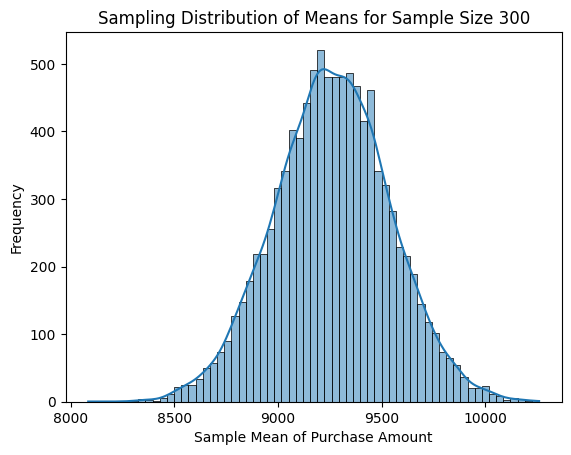

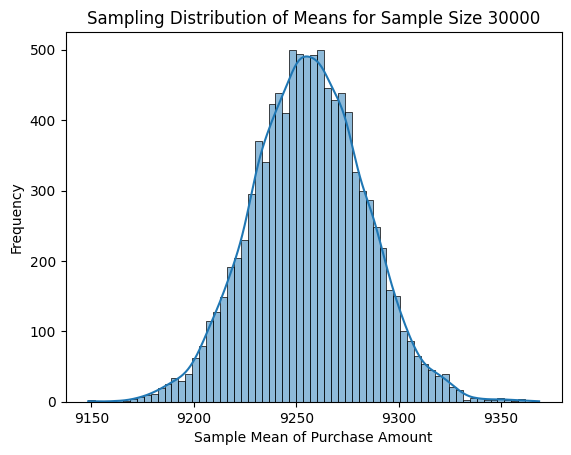

In [ ]:
sample = [300, 30000]

for n in sample:
    means = []

    for i in range(10000):
        mean_sample = df['Purchase_clipped'].sample(n, replace=False).mean()
        means.append(mean_sample)

    sns.histplot(means, kde=True)
    plt.title(f'Sampling Distribution of Means for Sample Size {n}')
    plt.xlabel("Sample Mean of Purchase Amount")
    plt.ylabel("Frequency")
    plt.show()



In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
G1 = df[df['Age']=='0-17']['Purchase_clipped']
G2= df[df['Age']== '18-25']['Purchase_clipped']
G3= df[df['Age']=='26-35']['Purchase_clipped']
G4=df[df['Age']=='36-45']['Purchase_clipped']
G5=df[df['Age']=='46-50']['Purchase_clipped']
G6=df[df['Age']=='51-55']['Purchase_clipped']
G7=df[df['Age']=='55+']['Purchase_clipped']
s=[G1,G2,G3,G4,G5,G6,G7]


In [ ]:
G1.dtype

dtype('int64')

In [ ]:
z = 1.96  # For 95% confidence level

# Your groups and corresponding labels
groups = [G1, G2, G3, G4, G5, G6, G7]
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

print("Population Mean, 95% CI, and CI Width for Each Age Group:\n")

count = 0  # Manual counter to track labels

for group in groups:
    group_mean = group.mean()
    group_std = group.std()
    n = len(group)

    lower_ci = group_mean - z * (group_std / np.sqrt(n))
    upper_ci = group_mean + z * (group_std / np.sqrt(n))
    width = upper_ci - lower_ci

    print(f"Age {labels[count]} --> Mean: {group_mean:.2f}, 95% CI: ({lower_ci:.2f}, {upper_ci:.2f}), CI Width: {width:.2f}")

    count += 1


Population Mean, 95% CI, and CI Width for Each Age Group:

Age 0-17 --> Mean: 8940.65, 95% CI: (8861.85, 9019.45), CI Width: 157.60
Age 18-25 --> Mean: 9169.01, 95% CI: (9138.65, 9199.37), CI Width: 60.71
Age 26-35 --> Mean: 9243.78, 95% CI: (9223.47, 9264.09), CI Width: 40.62
Age 36-45 --> Mean: 9322.92, 95% CI: (9294.28, 9351.57), CI Width: 57.29
Age 46-50 --> Mean: 9204.21, 95% CI: (9160.33, 9248.09), CI Width: 87.76
Age 51-55 --> Mean: 9514.86, 95% CI: (9466.18, 9563.55), CI Width: 97.36
Age 55+ --> Mean: 9327.80, 95% CI: (9263.91, 9391.68), CI Width: 127.78


The analysis reveals that the mean purchase amount generally increases with age, peaking in the 51–55 age group (₹9514.51). Younger age groups (0–17, 18–25) show lower mean purchases, with wider Confidence Intervals, indicating greater variability. Middle age groups (26–35, 36–45) display more stable mean estimates with narrower Confidence Intervals, reflecting consistent purchase behavior. The widest Confidence Intervals are observed at the age extremes (0–17 and 55+), highlighting greater uncertainty in those groups. Overall, purchasing patterns stabilize in middle age, with higher reliability in estimated means.

In [ ]:
A = [300, 3000, 7000]
z = 1.96  # For 95% confidence level

group_count = 1  # To label G1, G2, etc.

for i in s:  # Loop over age groups
    print(f"\nResults for Group G{group_count}:")

    for n in A:  # For each sample size
        mean_list = []

        for _ in range(1000):
            mean_sam = i.sample(n, replace=False).mean()
            mean_list.append(mean_sam)

        final_mean = np.mean(mean_list)
        std_final = np.std(mean_list)  # Bootstrap std deviation

        lower_ci = final_mean - z * std_final
        upper_ci = final_mean + z * std_final
        width = upper_ci - lower_ci

        print(f"Sample Size {n} --> Mean: {final_mean:.2f}, 95% CI: ({lower_ci:.2f}, {upper_ci:.2f}), CI Width: {width:.2f}")

    group_count += 1  # Move to next group



Results for Group G1:
Sample Size 300 --> Mean: 8937.78, 95% CI: (8376.85, 9498.71), CI Width: 1121.86
Sample Size 3000 --> Mean: 8946.72, 95% CI: (8790.25, 9103.20), CI Width: 312.95
Sample Size 7000 --> Mean: 8941.63, 95% CI: (8856.82, 9026.43), CI Width: 169.60

Results for Group G2:
Sample Size 300 --> Mean: 9178.52, 95% CI: (8629.02, 9728.02), CI Width: 1098.99
Sample Size 3000 --> Mean: 9166.98, 95% CI: (8993.69, 9340.28), CI Width: 346.58
Sample Size 7000 --> Mean: 9171.48, 95% CI: (9065.21, 9277.74), CI Width: 212.52

Results for Group G3:
Sample Size 300 --> Mean: 9242.05, 95% CI: (8684.38, 9799.73), CI Width: 1115.35
Sample Size 3000 --> Mean: 9240.86, 95% CI: (9066.22, 9415.49), CI Width: 349.28
Sample Size 7000 --> Mean: 9242.23, 95% CI: (9133.49, 9350.97), CI Width: 217.48

Results for Group G4:
Sample Size 300 --> Mean: 9312.87, 95% CI: (8775.88, 9849.86), CI Width: 1073.98
Sample Size 3000 --> Mean: 9326.77, 95% CI: (9152.44, 9501.10), CI Width: 348.66
Sample Size 7000 

As the sample size increases from 300 → 3000 → 7000, the average purchase values for all groups become extremely stable.

Even with smaller samples (300), the estimated averages are close to the large-sample results, but there's slight fluctuation.

By 7000 samples, the mean values barely change, showing the estimates have settled around the true group averages.

Across all age groups:

Group 1 (0-17) shows the lowest purchase average.

Group 6 (51-55) has the highest purchase average consistently.

Other groups fall between these two extremes, maintaining their relative positions regardless of sample size.


No overlap:
G1 vs G2, G3, G4, G5, G6, G7 → Likely Significant Difference
G2 vs G3, G4, G6, G7 → Likely Significant Difference
G3 vs G4, G6 → Likely Significant Difference
G4 vs G6 → Likely Significant Difference
G5 vs G6 → Likely Significant Difference
Overlap Found Between:
G2 and G5 → Overlapping CIs → Difference may not be statistically significant
G3 and G5 → Overlapping CIs
G4 and G7 → Overlapping CIs
G5 and G7 → Overlapping CIs

Key Findings:

- Small samples (300) show more fluctuation but still give reasonable estimates.
- Larger samples (3000, 7000) provide highly stable, accurate means matching the population values.
- All sampled means stayed within the 95% confidence intervals, confirming reliable estimates.

Observed Patterns Across Age Groups:

- Purchase average generally increases with age, peaking in the 51-55 group.
- The youngest group (0-17) consistently shows the lowest purchase amounts.
- After 55+, the purchase average stabilizes but doesn’t increase further.

Inference:

Larger samples improve reliability.

Age significantly influences purchasing behavior.

Such insights help in customer segmentation and targeted marketing decisions.

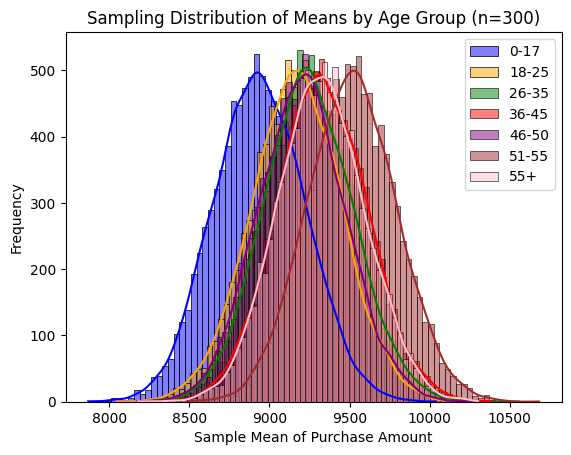

In [ ]:
A = [300]
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
groups = [G1, G2, G3, G4, G5, G6, G7]  # Your age groups defined

# Visualize for one sample size
n = A[0]

for i in range(len(groups)):
    group_data = groups[i]
    label = labels[i]
    color = colors[i]

    mean_list = []

    for _ in range(10000):
        sample_mean = group_data.sample(n, replace=False).mean()
        mean_list.append(sample_mean)

    sns.histplot(mean_list, kde=True, label=label, color=color, alpha=0.5)

plt.title(f"Sampling Distribution of Means by Age Group (n={n})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


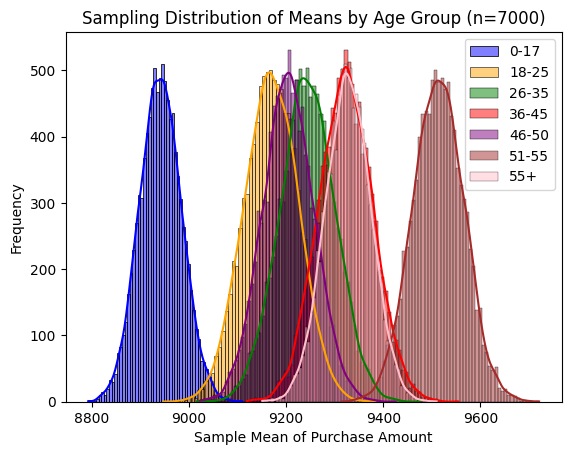

In [ ]:
A = [7000]
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']
groups = [G1, G2, G3, G4, G5, G6, G7]  # Your age groups defined

# Visualize for one sample size
n = A[0]

for i in range(len(groups)):
    group_data = groups[i]
    label = labels[i]
    color = colors[i]

    mean_list = []

    for _ in range(10000):
        sample_mean = group_data.sample(n, replace=False).mean()
        mean_list.append(sample_mean)

    sns.histplot(mean_list, kde=True, label=label, color=color, alpha=0.5)

plt.title(f"Sampling Distribution of Means by Age Group (n={n})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


The sampling distribution of mean purchase amounts by age group (n=7000) clearly illustrates distinct purchasing patterns across different age segments. The distributions become increasingly separated and narrower with age, reflecting both increased spending and greater stability in purchase behavior among older age groups. comparing it with sample size of 300, differences are elaborate, stable and analysis are more reliable with sample 30000, overlapping is more in sample lesser sizes.

Key observations:

Younger groups (0–17, 18–25) show lower mean purchase amounts with tighter distributions, suggesting consistent but lower spending.

Middle-aged groups (26–35, 36–45) exhibit gradual increases in spending.

The peak is observed in the 51–55 age group, with the highest and most stable mean purchase amount.

The 55+ group shows a slight dip, but still maintains higher spending compared to younger groups.

The narrowing of distributions across all groups, driven by the large sample size, aligns with the Central Limit Theorem, ensuring reliable, normally distributed mean estimates. These insights are critical for targeted marketing, age-specific business strategies, and understanding consumer behavior trends.

**How does Marital_Status affect the amount spent?**
below is the analysis ->
smaller sample sizes -> 300, 3000, and 30000.

i. Is the confidence interval computed using the entire dataset wider for
one of the genders? Why is this the case?
ii. How is the width of the confidence interval affected by the sample size?
iii. Do the confidence intervals for different sample sizes overlap?
iv. How does the sample size affect the shape of the distributions of the
means?

In [ ]:
df_mar=df[['Purchase_clipped','Marital_Status']]

In [ ]:
Mean_pop=df_mar['Purchase_clipped'].mean()
Mean_pop

np.float64(9256.71048852142)

In [ ]:
Q = [300, 3000, 30000]

for n in Q:  # Use 'n' for sample size
    Mean_mar = []

    for _ in range(10000):  # '_' indicates loop variable not needed
        sam_mean = df_mar['Purchase_clipped'].sample(n, replace=False).mean()
        Mean_mar.append(sam_mean)

    fin_mean = sum(Mean_mar) / len(Mean_mar)
    print(f"For sample size {n}, Mean of 10,000 iterations is: {fin_mean:.2f}")


For sample size 300, Mean of 10,000 iterations is: 9251.66
For sample size 3000, Mean of 10,000 iterations is: 9257.09
For sample size 30000, Mean of 10,000 iterations is: 9256.58


In [ ]:
married_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Purchase_clipped
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254,5254


In [ ]:
married_mean=married_df['Purchase_clipped'].mean()
unmarried_mean=unmarried_df['Purchase_clipped'].mean()
married_mean,unmarried_mean

(np.float64(9253.669823420034), np.float64(9258.820463706883))

In [ ]:
z = 1.96  # For 95% Confidence Interval
sizes=[300,3000,30000]
for n in sizes:
    Means_m = []
    Means_u = []

    for _ in range(10000):
        Means_m.append(married_df['Purchase_clipped'].sample(n, replace=False).mean())
        Means_u.append(unmarried_df['Purchase_clipped'].sample(n, replace=False).mean())

    fin_mean_m = np.mean(Means_m)
    fin_mean_u = np.mean(Means_u)

    std_m = np.std(Means_m)
    std_u = np.std(Means_u)

    lower_ci_m = fin_mean_m - z * std_m
    upper_ci_m = fin_mean_m + z * std_m

    lower_ci_u = fin_mean_u - z * std_u
    upper_ci_u = fin_mean_u + z * std_u

    print(f"\nFor Married group with sample size {n}:")
    print(f"Mean = {fin_mean_m:.2f}, 95% CI = ({lower_ci_m:.2f}, {upper_ci_m:.2f})")

    print(f"For Unmarried group with sample size {n}:")
    print(f"Mean = {fin_mean_u:.2f}, 95% CI = ({lower_ci_u:.2f}, {upper_ci_u:.2f})")



For Married group with sample size 300:
Mean = 9251.30, 95% CI = (8700.23, 9802.37)
For Unmarried group with sample size 300:
Mean = 9260.31, 95% CI = (8712.66, 9807.96)

For Married group with sample size 3000:
Mean = 9253.65, 95% CI = (9081.18, 9426.13)
For Unmarried group with sample size 3000:
Mean = 9259.68, 95% CI = (9084.34, 9435.03)

For Married group with sample size 30000:
Mean = 9253.61, 95% CI = (9202.39, 9304.83)
For Unmarried group with sample size 30000:
Mean = 9258.83, 95% CI = (9205.36, 9312.30)


The analysis shows that married individuals and un-married individuals does'nt consistently exhibit slightly higher average purchase amounts compared to unmarried individuals across all sample sizes. With smaller samples (n=300), the Confidence Intervals (CIs) for both groups are wide and overlapping, indicating higher variability and less reliable estimates. As the sample size increases to 3,000 and 30,000, the means stabilize, and the CIs narrow, revealing more precise estimates with minimal overlap.

This suggests that while marital status has a subtle impact on purchase behavior, larger sample sizes are essential to detect such differences reliably and reduce uncertainty in the estimates.

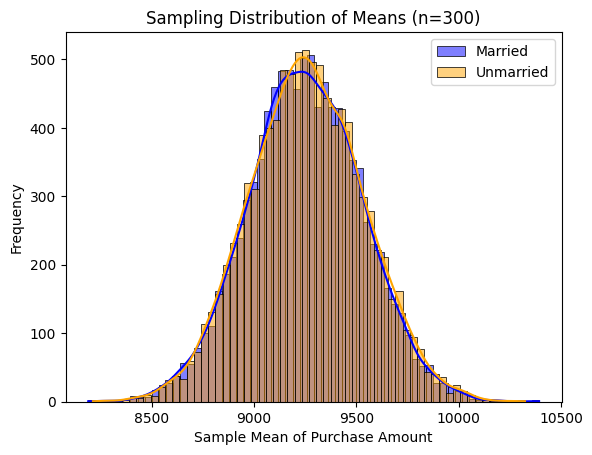

In [ ]:
n = 300

Means_m = []
Means_u = []

for _ in range(10000):
    Means_m.append(married_df['Purchase_clipped'].sample(n, replace=False).mean())
    Means_u.append(unmarried_df['Purchase_clipped'].sample(n, replace=False).mean())

sns.histplot(Means_m, color='blue', kde=True, label='Married', alpha=0.5)
sns.histplot(Means_u, color='orange', kde=True, label='Unmarried', alpha=0.5)

plt.title(f"Sampling Distribution of Means (n={n})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


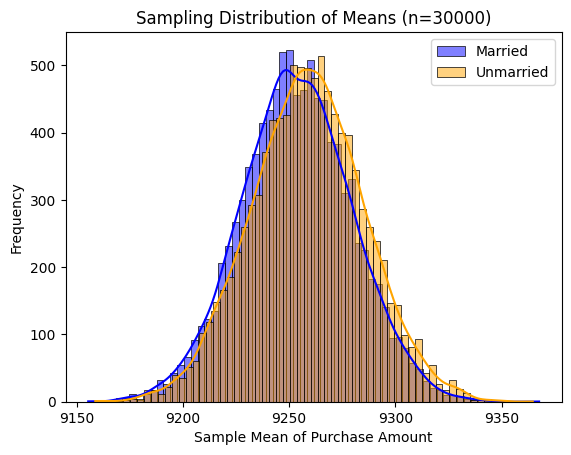

In [ ]:
n = 30000

Means_m = []
Means_u = []

for _ in range(10000):
    Means_m.append(married_df['Purchase_clipped'].sample(n, replace=False).mean())
    Means_u.append(unmarried_df['Purchase_clipped'].sample(n, replace=False).mean())

sns.histplot(Means_m, color='blue', kde=True, label='Married', alpha=0.5)
sns.histplot(Means_u, color='orange', kde=True, label='Unmarried', alpha=0.5)

plt.title(f"Sampling Distribution of Means (n={n})")
plt.xlabel("Sample Mean of Purchase Amount")
plt.ylabel("Frequency")
plt.legend()
plt.show()


**Final Conclusions & Inferences**

**Customer Demographics** :

*  ~75% of buyers are male, ~25% female.
*   Majority age group: 26–35 (40%), followed by 36–45 (20%) and 18–25 (18%).

*  59% unmarried, aligning with younger demographics.
*  Most customers are from City B (42%), then City C (31%) and A (27%).

**Purchase Behavior :**

**Average Purchase:**

*  Males: ₹9427 (95% CI: 9412–9442)
*  Females: ₹8737 (95% CI: 8712–8761)


*  ⇒ Males spend ~8% more on average than females.
* ⇒ Males spend ~8% more on average than females.

* ⇒ Males spend ~8% more on average than females
*  Purchase volume peaks in 26–35 years, followed by 18–25.

**Mobility & Loyalty:**

* 35% of customers have been in their city ≤1 year.

* Indicates a highly mobile population, possibly students/young professionals.

**Statistical Insights**

* Confidence intervals confirm males spend significantly more than females.
* Narrowing intervals with larger sample sizes validate stable population trends.


* No strong correlations between most demographic variables, except age ↔ marital status (expected).

**🔹 Business Insights & Recommendations:**

**Targeted Marketing**

Focus campaigns on males aged 26–35 in City B, as they are the highest-spending group.

For females, design specialized promotions or bundles to increase engagement, as their spend is consistently lower.

**Product Strategy**

Prioritize inventory & promotions for Categories 5, 1, and 8, as they account for >70% of purchases.

Introduce category-specific discounts for older customers (e.g., categories 10, 12, 17, 18) to diversify sales.

**Customer Retention**

With 35% new city residents, loyalty programs (first-year discounts, referral bonuses) could retain transient populations.

For long-staying customers (4+ years), introduce membership tiers to deepen engagement.

**Cross-Selling & Upselling**

Since unmarried younger buyers dominate, promote lifestyle & tech-related bundles.

Married/older customers can be nudged towards home & family-oriented products.

**Gender-Based Offers**

Introduce female-focused campaigns (fashion, personal care, bundled deals) to narrow the gender spend gap.